In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('alldata.csv')

In [3]:
df.drop(columns = 'reviews', inplace = True)

In [4]:
df.drop(index = df[df['position'].isnull()].index, inplace = True)
df.isnull().any()

position       False
company        False
description    False
location       False
dtype: bool

In [5]:
df['location']
df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df['location'].apply(lambda x: x.split(',')[0].strip())
df['state'] = df['location'].apply(lambda x: x.split(',')[1].strip())
df['location'] = df['city'] + ',' + df['state']

In [7]:
data = df.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

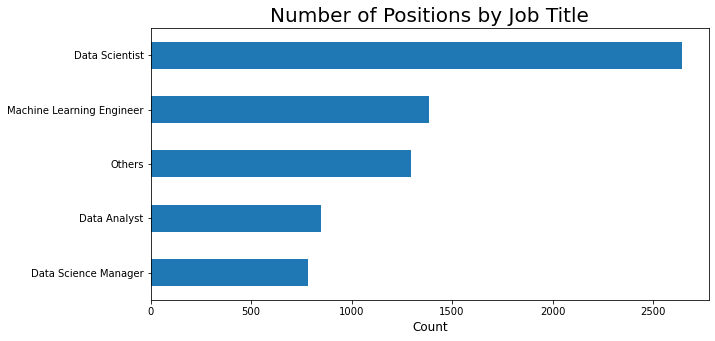

In [72]:
title = data.groupby(['position']).count().sort_values('company')

title['company'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()

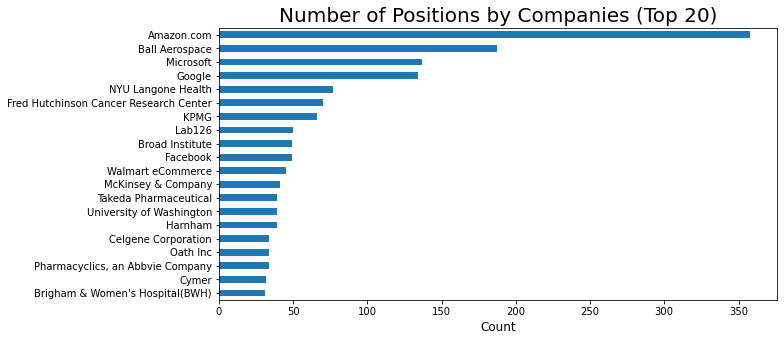

In [80]:
company = df.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

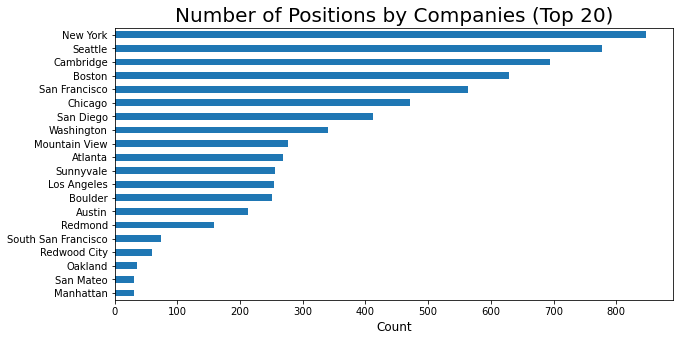

In [81]:
city = df.groupby(['city']).count().sort_values('position').tail(20)

city['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

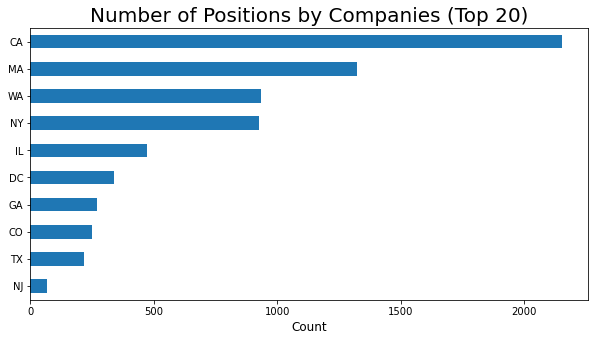

In [82]:
state = df.groupby(['state']).count().sort_values('position').tail(20)

state['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

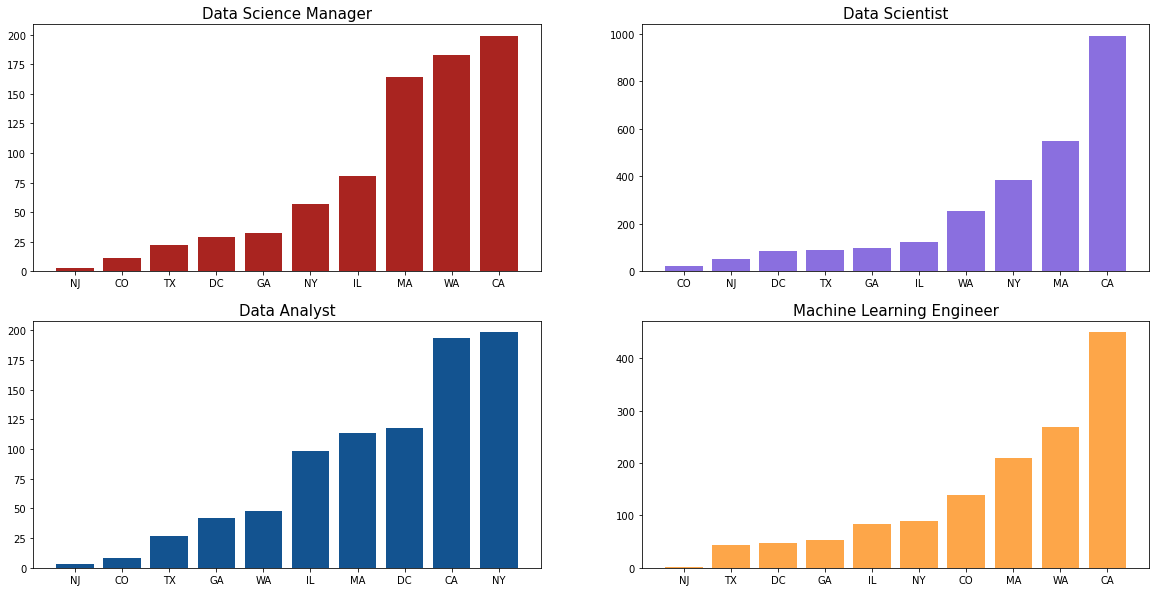

In [89]:
data = data[data['position']!='Others']
color = ['#A92420','#8A6FDF','#135390','#FDA649']
i = 1
fig = plt.figure(figsize = (20,10))
for positions in data['position'].unique():
    x = data[data['position'] == str(positions)].groupby('state').count().sort_values('position')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(positions), size = 15)
plt.show()

In [93]:
data['description'] = data['description'].apply(lambda x: str(x).lower())

In [97]:
import unicodedata
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [98]:
data['description'] = data['description'].apply(lambda x: remove_accented_chars(x))

In [100]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

data['description'] = data['description'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
text = ' '.join(data['description'])

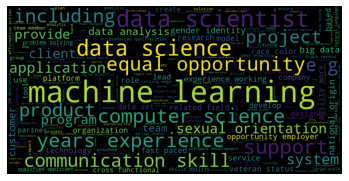

In [103]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [105]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmer = WordNetLemmatizer()
data['description'] = data['description'].apply(lambda x: word_tokenize(x))
data['description'] = data['description'].apply(lambda x : [lemmer.lemmatize(y) for y in x])
data['description'] = data['description'].apply(lambda x: ' '.join(x))

In [106]:
from sklearn.feature_extraction import text
extra_stopword = ['data','experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

In [114]:
data = data.groupby('position').agg(lambda col: ' '.join(col))
data = data[['description']]

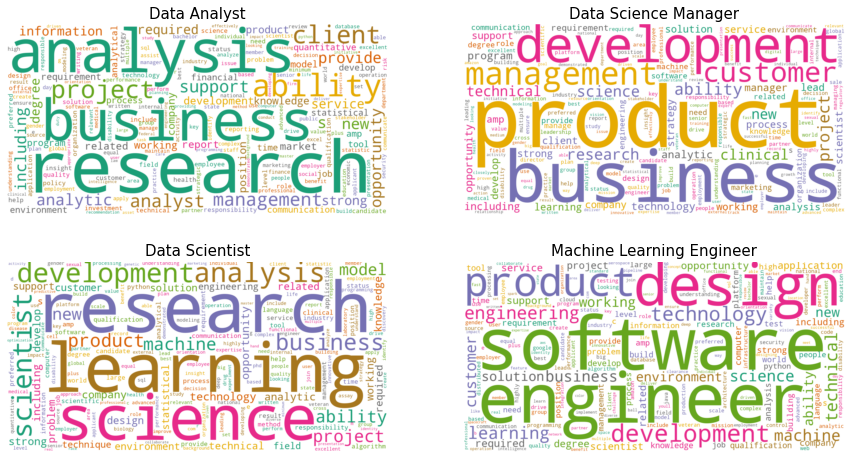

In [115]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1600, height=800)
i = 0
fig = plt.figure(figsize=(15,8))
for x in data['description'].index:
    wc.generate(data.description[str(x)])
    
    i += 1
    fig.add_subplot(2, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size = 15)
plt.show()

In [116]:
text = df.description.values

In [120]:
# Print out the first 5 examples of matches
limit = 0
for t in text:
    for sentence in t.split('\n'):
        if 'experience' in sentence:
            year = re.findall("\d{1,2}\+? year", sentence)
            if len(year)==1:
                print(year[0])
                print(sentence)
                print("*"*20)
                limit +=1
    if limit >= 5:
        break

8 year
Bachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work independently and make progress on several prospects/projects at the same time.Excellent English oral, written and presentation skillsStrong leadership and management skills, as well as the ability to forge strong interpersonal relationshipsAbility to travelExcellent computer skills including use of word processing, spreadsheet, database, presentation and prospect management software operating off a PC-based system including Salesforce.
********************
5+ year
5+ years experience, with varying datasets and experience with Computational Biology/Statistics/Physics, Mathematics, Computer Science, Algorithms/Incorporate Learning, etc.
********************
10+ year
10+ years of experience in Data Architecture in a professional services environment is highly preferred
**

In [121]:
experience_req = []
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                num = year[0].split(' ')
                experience_req.append(num[0])

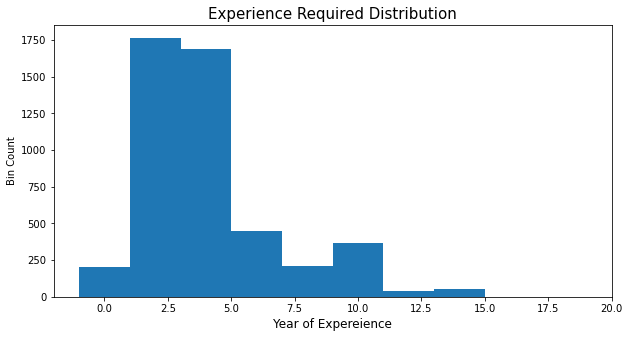

The average year of experience required is 4.67 years


In [122]:
# Remove the '+' sign after year value
for n,i in enumerate(experience_req):
    if "+" in i:
        experience_req[n] = re.sub(r'\+','',i)
experience_req = [int(item) for item in experience_req]
# Remove outliers
for n,i in enumerate(experience_req):
    if i >= 20:
        experience_req.pop(n)

#Plot the graph        
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,21,2)), align = 'left')
plt.title('Experience Required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Year of Expereience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(experience_req),2)} years')

In [123]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count


# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})


# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,2187,0.31
1,Python,(?i)\WPython\W,2822,0.41
2,Hadoop,(?i)\WHadoop\W?,923,0.13
3,SQL,(?i)SQL\w*,1924,0.28
4,Tableau,(?i)\WTableau\W?,492,0.07
5,TensorFlow,(?i)\WTensorFlow\W?,406,0.06
6,Agile,(?i)\WAgile\W?,698,0.10
7,Power BI,(?i)\WPower\s?BI\W?,66,0.01
8,SSaS,(?i)\WSSAS\W?,9,0.00
9,Algorithm,(?i)\WAlgorithms?\W?,1703,0.24


<ipython-input-124-fe73f0cf68f8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


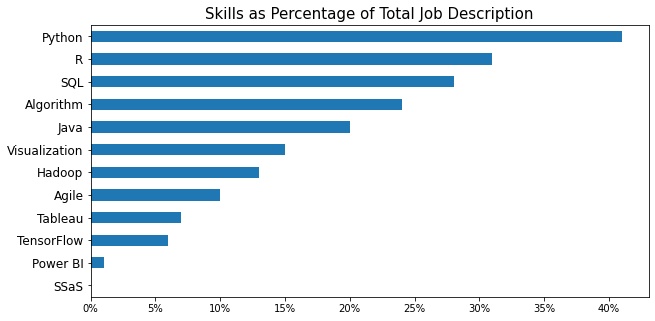

In [124]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

<ipython-input-125-36f2161bbdc2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


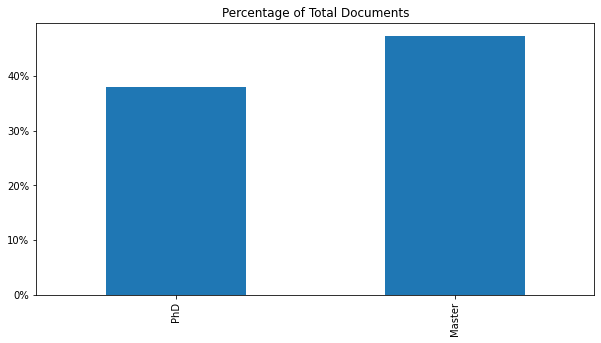

In [125]:
# Define regex pattern and seach for PhD
pattern = re.compile('(?i)\WPh.?D\W')
pattern2 = re.compile('(?i)\WDoctorate\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree = {"PhD": count}


# Define regex pattern and seach for Master 
pattern = re.compile("(?i)\WMasters?'?s?\W")
pattern2 = re.compile('(?i)\WM.?S\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree.update({"Master":count})
degree = pd.DataFrame.from_dict(degree,orient='index',
                       columns=[ 'count'])
degree['ptg'] = degree['count']/len(text)


#plotting the graph
ax =degree['ptg'].plot(kind = "bar", figsize =(10,5))
ax.set_title('Percentage of Total Documents')
ax.set_xticklabels(degree.index)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()